In [23]:
from matplotlib import pyplot as plt
import scipy as scp
import scipy.fft
import numpy as np
from numpy import cos, sin, pi,  arange

#from scipy.signal import kaiserord, lfilter, firwin, freqz, convolve,filtfilt

sample_rate = 100.0
nsamples = 400
t = arange(nsamples) / sample_rate
x = cos(2*pi*0.5*t) + 0.2*sin(2*pi*2.5*t+0.1) + \
        0.2*sin(2*pi*15.3*t) + 0.1*sin(2*pi*16.7*t + 0.1) + \
            0.1*sin(2*pi*23.45*t+.8)
            

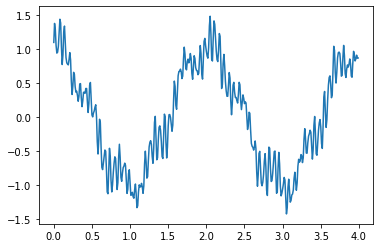

In [24]:
plt.plot(t,x)

  - split the complex fourier result into *angle* and *magnitude* 

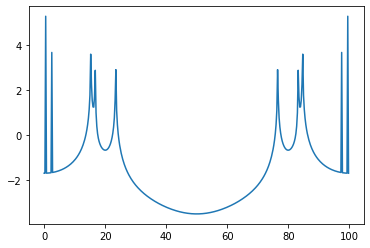

In [25]:

T = 4
#dF = 1/T = 0.25Hz
fs = 100
#nyquist-frequency = fs/2

f = np.linspace(0,fs-1/T,fs*T)
plt.plot(f,np.log(np.abs(scp.fft.fft(x))))

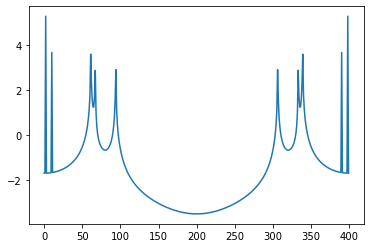

In [26]:
plt.plot(np.log(np.abs(np.fft.fft(x))))

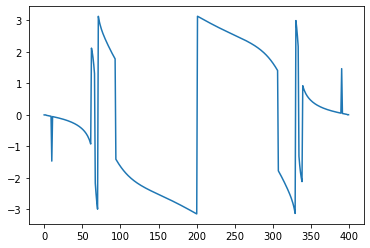

In [27]:
plt.plot(np.angle(scp.fft.fft(x)))

- set the respective magnitudes to zero (we start with a lowpass filter: `magnitude[30:370] = 0`)


<ipython-input-28-f03e4ff6ff98>:5: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(mag))


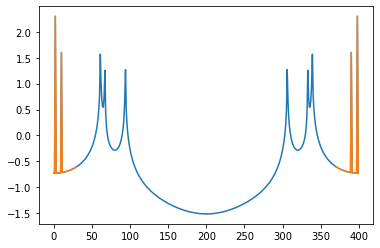

In [28]:
ang = np.angle(scp.fft.fft(x))
mag = np.abs(scp.fft.fft(x))
plt.plot(np.log10(mag))
mag[30:370] = 0
plt.plot(np.log10(mag))

- combine angle and magnitude back to a complex fourier coefficient ($m*e^(1j*ang)$)
- apply the inverse FFT
- plot the signal with what you started out


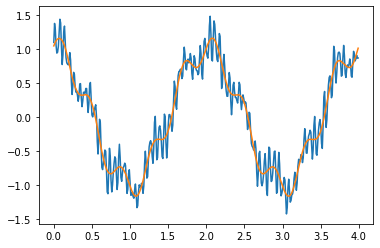

In [29]:
plt.plot(t,x)
plt.plot(t,scp.fft.ifft(mag*np.exp(1j*ang)).real)


## Highpass instead of lowpass

Repeat the steps from above, but this time, remove the low frequency components


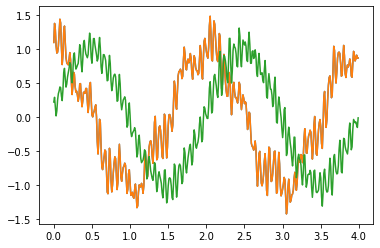

In [30]:
ang = np.angle(scp.fft.fft(x))
mag = np.abs(scp.fft.fft(x))


#mag[1:30] = 0
#mag[370:400] = 0



plt.plot(t,x)
plt.plot(t,scp.fft.ifft(mag*np.exp(1j*ang)).real)

ang_random = np.random.rand(ang.shape[0])*2*np.pi - np.pi
plt.plot(t,scp.fft.ifft(mag*np.exp(1j*ang_random)).real)


In [31]:
ang.shape

(400,)


## What happens to the frequency and time response if we add "artefacts"?
 Add a DC-offset (a step-function) starting from `x[200:]` and investigate the fourier space. Filter it again (low or high pass) and transfer it back to the time domain and investigate the signal around the spike.

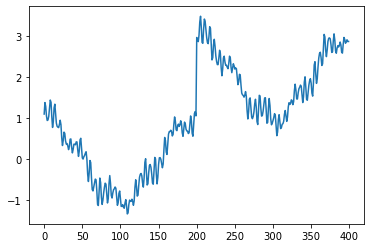

In [32]:
xtmp = x
xtmp[200:] = xtmp[200:]+2
plt.plot(xtmp)

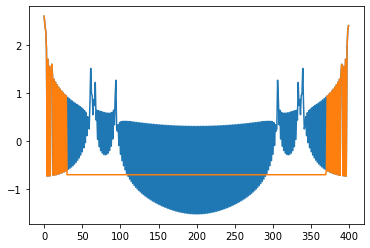

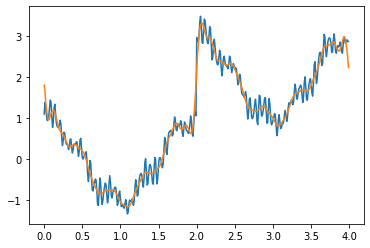

In [33]:

ang = np.angle(scp.fft.fft(xtmp))
mag = np.abs(scp.fft.fft(xtmp))
plt.plot(np.log10(mag))
mag[30:370] = 0.2
plt.plot(np.log10(mag))
plt.show()
plt.plot(t,xtmp)
plt.plot(t,scp.fft.ifft(mag*np.exp(1j*ang)).real)


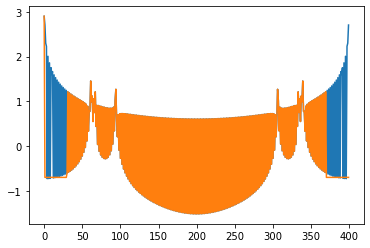

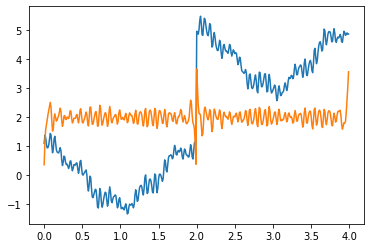

In [34]:
xtmp = x
xtmp[200:] = xtmp[200:]+2
ang = np.angle(scp.fft.fft(xtmp))
mag = np.abs(scp.fft.fft(xtmp))
plt.plot(np.log10(mag))
mag[1:30] = 0.2
mag[370:400] = 0.2
plt.plot(np.log10(mag))
plt.show()
plt.plot(t,x)
plt.plot(t,scp.fft.ifft(mag*np.exp(1j*ang)).real)

 ## Impulse Response Function
 To get a bit deeper understanding of what is going on, have a look at the fourier transform of a new impulse signal (e.g. 1:400 => 0. and 200 => 1.). What do you observe?
 Why would we see ringing if we put most of the coefficients to 0?

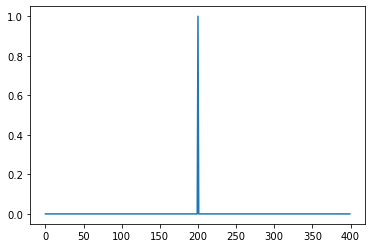

In [35]:
# Impulse Response Function
x[:] =0
x[200] = 1
plt.plot(x)

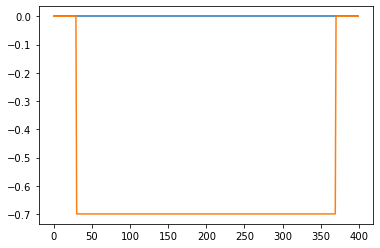

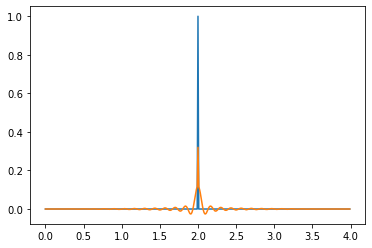

In [36]:

ang = np.angle(scp.fft.fft(x))
mag = np.abs(scp.fft.fft(x))
plt.plot(np.log10(mag))
mag[30:370] = 0.2
plt.plot(np.log10(mag))
plt.show()
plt.plot(t,x)
plt.plot(t,scp.fft.ifft(mag*np.exp(1j*ang)).real)


 ## Filtering EEG data


In [37]:
import sys
sys.path.insert(0,"..")
from mne_bids import (BIDSPath,read_raw_bids)
import mne_bids
import importlib
import ccs_eeg_utils

bids_root = "../local/bids"
bids_root = "/bigpool/export/users/ehinger/erp-core/bids" # Bene's Server location
subject_id = '002'


bids_path = BIDSPath(subject=subject_id,task="P3",session="P3",
                     datatype='eeg', suffix='eeg',
                     root=bids_root)
raw = read_raw_bids(bids_path)
ccs_eeg_utils.read_annotations_core(bids_path,raw)
raw.load_data()

<ipython-input-37-0acd9a0e0283>:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path)


Reading events from /bigpool/export/users/ehinger/erp-core/bids/sub-002/ses-P3/eeg/sub-002_ses-P3_task-P3_events.tsv.
The event "response" refers to multiple event values. Creating hierarchical event names.
    Renaming event: response -> response/202
    Renaming event: response -> response/202
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response

<ipython-input-37-0acd9a0e0283>:16: RuntimeWarning: Participants file not found for sub-002_ses-P3_task-P3_eeg.set... Not reading in any particpants.tsv data.
  raw = read_raw_bids(bids_path)


<RawEEGLAB | sub-002_ses-P3_task-P3_eeg.set, 33 x 414720 (405.0 s), ~104.4 MB, data loaded>

**T:** Choose the channel "Pz", plot the channel (same as previous HW)

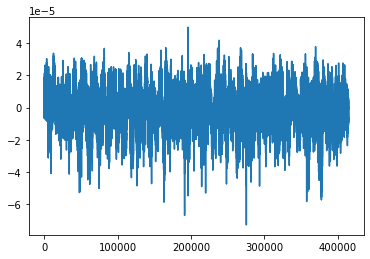

In [38]:
#%matplotlib qt
raw.pick_channels(["Pz"])#["Pz","Fz","Cz"])
plt.plot(raw[:,:][0].T)

**T:** Plot the fourier space using `raw.plot_psd`


Effective window size : 2.000 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


<ipython-input-39-1eaa5f2d91b2>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(area_mode='range', tmax=10.0, average=False,xscale="linear",);


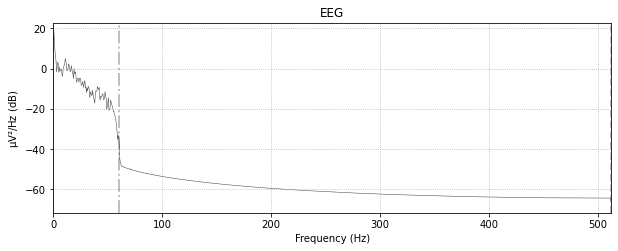

In [39]:
%matplotlib inline
raw.plot_psd(area_mode='range', tmax=10.0, average=False,xscale="linear",);


In [40]:
plt.plot(np.abs(np.fft.fft(raw_f[:,:][0].T)))

NameError: name 'raw_f' is not defined


**T:** Now we filter using `raw.filter()`, specify a highpass of 0.5Hz and a lowpass of 50Hz. Plot the fourier spectrum again.

**T:** Plot the channel again, did the filter work as indented?


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 6759 samples (6.601 sec)

Effective window size : 2.000 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


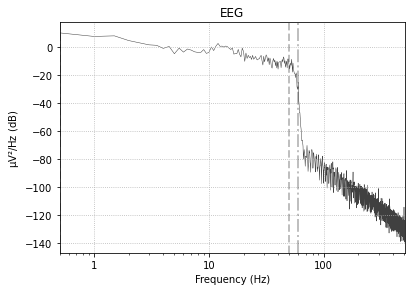

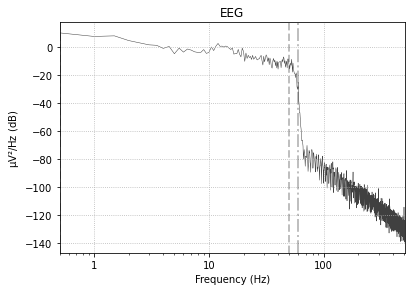

In [ ]:
raw_f = raw.copy().filter(0.5,50, fir_design='firwin')
raw_f.plot_psd(area_mode='range', tmax=10.0, average=False,xscale="log");

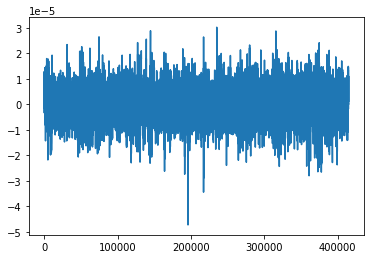

In [ ]:

plt.plot(raw_f[:,:][0].T)

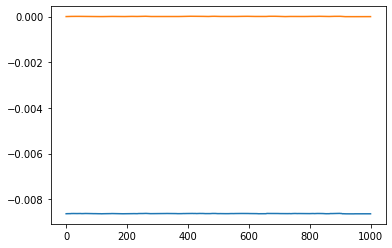

In [ ]:
plt.plot(raw[:,0:1000][0].T)
plt.plot(raw_f[:,0:1000][0].T)

Due to a huge DC-offset, the signals cannot be compared. We have to remove e.g. the median from each signal

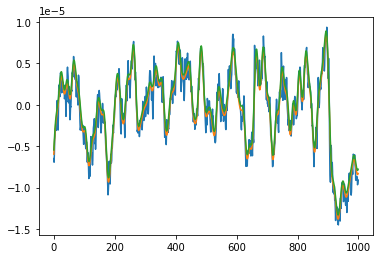

In [ ]:
plt.plot(raw[:,0:1000][0].T-np.median(raw[:,0:1000][0].T))
plt.plot(raw_f[:,0:1000][0].T-np.median(raw_f[:,0:1000][0].T))
plt.plot(raw_f[:,0:1000][0].T-np.mean(raw_f[:,0:1000][0].T))